-----------
Initializing structure...
Meep progress: 0.99/10.0 = 9.9% done in 4.0s, 36.6s to go
Meep progress: 2.02/10.0 = 20.2% done in 8.1s, 31.8s to go
Meep progress: 3.12/10.0 = 31.2% done in 12.1s, 26.7s to go
Meep progress: 4.23/10.0 = 42.3% done in 16.1s, 21.9s to go
Meep progress: 5.26/10.0 = 52.6% done in 20.1s, 18.1s to go
Meep progress: 6.36/10.0 = 63.6% done in 24.1s, 13.8s to go
Meep progress: 7.3100000000000005/10.0 = 73.1% done in 28.2s, 10.4s to go
Meep progress: 8.24/10.0 = 82.4% done in 32.2s, 6.9s to go
Meep progress: 9.11/10.0 = 91.1% done in 36.2s, 3.5s to go
run 0 finished at t = 10.0 (1000 timesteps)


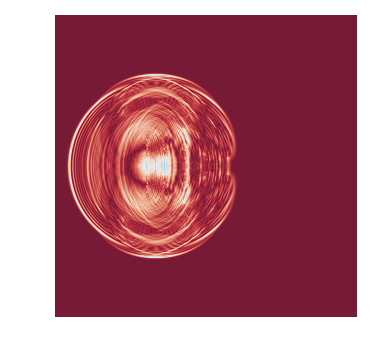

In [52]:
import math
import numpy as np
import matplotlib.pyplot as plt
import meep as mp
from meep.materials import fused_quartz

resolution = 50  # pixels/μm
CELL_SIZE = [30, 30, 0]
cell_size = mp.Vector3(*CELL_SIZE)
pml_layers = [ mp.PML(1.0) ]

wvl_min = 0.4
wvl_max = 0.8
fmin = 1 / wvl_max
fmax = 1 / wvl_min
fcen = 0.5 * (fmax + fmin)
df = fmax - fmin
nfreq = 50

# sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df),
#                      component=mp.Ez,
#                      center=mp.Vector3(0, 0))]

sources = [mp.Source(mp.ContinuousSource(frequency=0.1),
                     component=mp.Ez,
                     center=mp.Vector3(-5, 0))]

# ORG = mp.Medium(index=7)
#ORG = mp.Medium(index=1)

geometry = [mp.Block(mp.Vector3(mp.inf,mp.inf,mp.inf), # medium
                     center=mp.Vector3(0,0),
                    material=mp.Medium(epsilon=1.2))]
#            mp.Block(mp.Vector3(12,0.2,0.2), # main rod
#                      center=mp.Vector3(0,0),
#                     material=mp.Medium(epsilon=12))]

for i in range(6):
    geometry.append(mp.Block(mp.Vector3(0.2, 6 - i, 0.2),
                            center=mp.Vector3(-6+2*i),
                            material=mp.Medium(epsilon=12)))

sim = mp.Simulation(cell_size=cell_size,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

sim.run(until=10)

eps_data = sim.get_array(center=mp.Vector3(), size=cell_size, component=mp.Dielectric)

ez_data_x = sim.get_array(center=mp.Vector3(), size=cell_size, component=mp.Ex)
ez_data_y = sim.get_array(center=mp.Vector3(), size=cell_size, component=mp.Ey)
ez_data_z = sim.get_array(center=mp.Vector3(), size=cell_size, component=mp.Ez)

power = np.sqrt(ez_data_x ** 2 + ez_data_y ** 2 + ez_data_z ** 2)

plt.figure(dpi=100)
#plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.imshow(power.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(power.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')
plt.show()

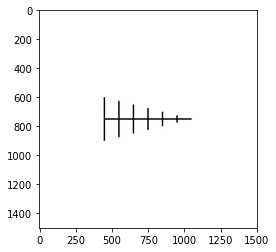

In [50]:
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.show()